# Rorschach's Journal

**January 21, 2023:**

A new evil was born today, and nobody cares. Nobody cares but me. QR codes, silent sentinels of a digital age, now infest this forsaken city. Restaurant menus, once clear as ink on parchment, have transmuted into cryptic mazes of pixles. The masses embrace this sinister change, surrendering to the code's grasp, one menu at a time.

To stem the QR code contagion, I must start at the root. Found a lead: Thonky's QR Code tutorial. Teaches dark arts practitioners, the programming sorcerers, how to conjure secrets within these symbols. It may hold the key to unraveling this wicked enigma.

I shall document my findings here, peeling back the layers of this digital incantation. Hidden truths lie within these cursed runes, concealed amidst lines of malevolent code. I'll delve into the abyss, for there is no turning back.

**January 23, 2023:**

It has been a few days, and the lead has proven fruitful. I have uncovered the source of this malevolence. QR codes were birthed by Denso-Wave, a Toyota subsidiary, back in 1994. They thought of everything, encoding numbers, letters, even Kanji characters. What's worse, this evil spreads without constraint, being license-free. I attempted to sabotage them, but their insidious error correction mechanisms thwarted my efforts. It appears I must descend into the muck of this digital sorcery after all. Some of the victims have come forward to share their harrowing tales, and I intend to visit them.

**January 30, 2023:**

A week spent interviewing victims from all walks of life. QR codes, versatile as they are, ensnare them all. Numeric mode, alphanumeric mode, byte mode—their sinister grasp knows no bounds. I have gathered enough knowledge to understand how these hapless souls are trapped within those loathsome squares.

In [57]:
# selecting a encoding mode based on input data

import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

INPUT = "None of you seem to understand. I'm not locked in here with you. You're locked in here with *ME*!"
output = ""

MODE = (
    "NUMERIC" if re.search("^\d*$", INPUT) is not None
    else "ALPHANUMERIC" if re.search("^[\dA-Z $%*+\-./:]*$", INPUT) is not None
    else "BYTE" if re.search("^[\x00-\xff]*$", INPUT) is not None
    else None
)

match MODE:

    case "NUMERIC": output += "0001"
    case "ALPHANUMERIC": output += "0010"
    case "BYTE": output += "0100"
    case _: 

        print("Input mode is not supported.")
        raise ValueError

print("Selected mode: %s" % MODE)

print("\nOutput so far:")
print(output)

Selected mode: BYTE

Output so far:
0100


**March 1, 2023**

I've observed the methodical targeting of victims, the meticulous study of their every move. Agents lurk, choosing the appropriate mode and encoding with precision. This operation must involve a vast network of agents. I've enlisted some assistance, though trust remains a precarious thread in this web of deception.

In [58]:
# loading tables containing necessay information

CAPACITIES = pd.read_csv(
    "tables/capacities.csv",
    sep = ' '
)

LENGTH_INDICATORS = pd.read_csv(
    "tables/length_indicators.csv",
    sep = ' '
)

ECC_INFO = pd.read_csv(
    "tables/ecc_info.csv",
    sep = ' '
)

LOG = [0] * 256
ANTILOG = [0] * 256

value = 1
for exponent in range(1, 256):

    value = (
        (value << 1) ^ 285 if value>127 
        else value << 1
    )

    LOG[value] = exponent % 255
    ANTILOG[exponent % 255] = value

REMAINDERS = pd.read_csv(
    "tables/remainders.csv",
    sep = ' '
)

FORMAT_INFO = pd.read_csv(
    "tables/format_info.csv",
    sep = ' ',
    dtype=str
)

In [59]:
# some helper functions

def show_image(
    image: np.ndarray, 
    grid: bool = True, 
    padding: bool = False
) -> None:
    
    if padding:
        image = np.pad(image, 6, mode='constant', constant_values=1)

    plt.imshow(image, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    
    if grid:

        plt.xticks([i-0.5 for i in range(image.shape[0])], labels=[])
        plt.yticks([i-0.5 for i in range(image.shape[0])], labels=[])
        plt.grid(visible=True, axis="both", color="red")

    plt.show()


def to_binary(x: int, n: int = 8) -> str:

    return (
        "0"*n + 
        bin(x).replace('b', '0')
    )[-n:]


def to_decimal(x: str) -> int:

    return int(x, base=2)


def print_output(output: str, m: int = 8) -> None:

    n = np.ceil(len(output)/8)

    i = 0
    while i < n:

        j = 0
        while j<m and i<n:

            print(output[i*8 : (i+1)*8], end=" ")
            i, j = i+1, j+1

        print()


def polynomial_multiplication(X: list, Y: list) -> list:

    nx, ny = len(X), len(Y)
    n = nx + ny - 1
    res = [0]*n

    for i in range(n):
        for ix in range(i+1):
            iy = i-ix

            if ix<nx and iy<ny and X[ix] and Y[iy]:
                res[i] ^= ANTILOG[(LOG[X[ix]] + LOG[Y[iy]]) % 255]

    return res


def polynomial_division(X: list, Y: list) -> list:

    nx = len(X)
    n = nx - len(Y) + 1
    res = X[:]

    for i in range(n):

        nr = len(res)
        if nr <=0 : break

        if res[0]:

            factor = ANTILOG[
                (LOG[res[0]] + LOG[Y[0]] * 254) % 255
            ]

            subtr = (
                polynomial_multiplication(Y, [factor]) + 
                [0]*nr
            )

            res = list(
                map(
                    lambda x: x[0] ^ x[1],
                    zip(res, subtr)
                )
            )

        res = res[1:]

    return res

In [60]:
# select QR code version and Error correction level

INPUT_LEN = len(INPUT)

temp = CAPACITIES[MODE] >= INPUT_LEN
temp = CAPACITIES[temp].sort_values(by=MODE)

VERSION = temp["VERSION"].iloc[0]
ECLEVEL = temp["ECLEVEL"].iloc[0]

print("Selecte version: %s" % VERSION)
print("Selected ec level: %s" % ECLEVEL)

temp = LENGTH_INDICATORS["VERSION"] == VERSION
temp = LENGTH_INDICATORS[temp][MODE].iloc[0]
LENGTH_INDICATOR = temp

output += to_binary(INPUT_LEN, LENGTH_INDICATOR)

print("\nOutput so far:")
print_output(output)

Selecte version: 9
Selected ec level: H

Output so far:
01000110 0001 


**March 2, 2023**

I've trailed these agents, watching them encode victims' inputs. My utilitarian nature restrained me from interference, for I seek to understand their ways and save others from their clutches. The toll is heavy, but I shall press on, documenting their encoding methods here, even at the risk of exposure.

In [61]:
match MODE:

    case "NUMERIC":

        print("Input mode is not supported.")
        raise ValueError

    case "ALPHANUMERIC":

        encoding = pd.read_csv(
            "tables/alphanumeric_encoding.csv",
            sep = ','
        )

        for i in range(0, INPUT_LEN, 2):

            x = INPUT[i:i+2]

            temp = encoding["CHARACTER"] == x[0]
            temp = encoding[temp]["VALUE"]
            a = temp.iloc[0]

            if len(x)==2:

                temp = encoding["CHARACTER"] == x[1]
                temp = encoding[temp]["VALUE"]
                b = temp.iloc[0]

                output += to_binary(a*45 + b, 11) # type: ignore

            else:

                output += to_binary(a, 6) # type: ignore

    case "BYTE":
        
        for x in INPUT:

            output += to_binary( # type: ignore
                int(
                    x.encode(encoding="iso-8859-1").hex(),
                    base = 16
                )
            )

    case _: 

        print("Input mode is not supported.")
        raise ValueError

temp = ECC_INFO[ECC_INFO["VERSION"] == VERSION]
temp = temp[temp["ECLEVEL"] == ECLEVEL]
NUMBITS = temp["DATACODEWORDS"].iloc[0] * 8

output += "0"*4
output = output[:NUMBITS]

temp = len(output) % 8
if temp > 0: 

    output += "0" * (8-temp)

temp = len(output)
while temp < NUMBITS:

    output += "1110110000010001"
    temp += 16

output = output[:NUMBITS]
    
print("Output so far:")
print_output(output)

Output so far:
01000110 00010100 11100110 11110110 11100110 01010010 00000110 11110110 
01100010 00000111 10010110 11110111 01010010 00000111 00110110 01010110 
01010110 11010010 00000111 01000110 11110010 00000111 01010110 11100110 
01000110 01010111 00100111 00110111 01000110 00010110 11100110 01000010 
11100010 00000100 10010010 01110110 11010010 00000110 11100110 11110111 
01000010 00000110 11000110 11110110 00110110 10110110 01010110 01000010 
00000110 10010110 11100010 00000110 10000110 01010111 00100110 01010010 
00000111 01110110 10010111 01000110 10000010 00000111 10010110 11110111 
01010010 11100010 00000101 10010110 11110111 01010010 01110111 00100110 
01010010 00000110 11000110 11110110 00110110 10110110 01010110 01000010 
00000110 10010110 11100010 00000110 10000110 01010111 00100110 01010010 
00000111 01110110 10010111 01000110 10000010 00000010 10100100 11010100 
01010010 10100010 00010000 11101100 


**March 3, 2023**

The addition of error correction to the encoded data occurred swiftly, yet it proved to be the most enigmatic puzzle to decipher. The complexities elude my understanding; the process unfolds before my eyes like a cryptic incantation. Were it not for my previous encounters with such arcane sorcery, I'd question my own sanity. Two sorcerers from a bygone era, the architects of Reed–Solomon codes, birthed a method capable of detecting and rectifying multiple symbol errors. It is this very enchantment that grants QR codes their unyielding resilience.

I find myself outmatched, confronted with forces beyond the boundaries of my knowledge. Alas, I'm not giving up. Not yet. Evil must be punished. Even in the face of Armageddon I shall not compromise.

In [62]:
temp = ECC_INFO[ECC_INFO["VERSION"] == VERSION]
temp = temp[temp["ECLEVEL"] == ECLEVEL]

blocks = []
for group in range(2):
    
    num_blocks = int(
        np.nan_to_num(
            temp["GROUP%dBLOCKS" % (group+1)].iloc[0]
        )
    )

    num_datacodewords = int(
        np.nan_to_num(
            temp["GROUP%dDATACODEWORDS" % (group+1)].iloc[0]
        )
    )

    for i in range(num_blocks):

        block = {
            "DATACODEWORDS": [],
            "ECCODEWORDS": []
        }

        for j in range(num_datacodewords):

            block["DATACODEWORDS"].append(output[:8])
            output = output[8:]

        blocks.append(block)

temp = ECC_INFO[ECC_INFO["VERSION"] == VERSION]
temp = temp[temp["ECLEVEL"] == ECLEVEL]

NUMECC = temp["ECCODEWORDS"].iloc[0]

GENPOLY = [1]
for i in range(NUMECC):

    GENPOLY = polynomial_multiplication(
        GENPOLY, 
        [1, ANTILOG[i]]
    )

for block in blocks:

    MSGPOLY = [
        to_decimal(x) 
        for x in block["DATACODEWORDS"]
    ]

    MSGPOLY += [0] * NUMECC

    block["ECCODEWORDS"] = [
        to_binary(x)
        for x in polynomial_division(MSGPOLY, GENPOLY)
    ]

for i, block in enumerate(blocks):

    print("==== Block %d ====" % (i+1))
    print("\nData:"); print_output(''.join(block["DATACODEWORDS"]))
    print("\nECC:"); print_output(''.join(block["ECCODEWORDS"]))
    print()

==== Block 1 ====

Data:
01000110 00010100 11100110 11110110 11100110 01010010 00000110 11110110 
01100010 00000111 10010110 11110111 

ECC:
11010111 00111111 01101000 01001010 11110001 10010001 01001111 01110011 
11111000 11001100 11101101 00110110 11011010 11111011 11100110 10011111 
11100010 10111011 01111001 11000101 10110101 10011101 00110010 11011100 

==== Block 2 ====

Data:
01010010 00000111 00110110 01010110 01010110 11010010 00000111 01000110 
11110010 00000111 01010110 11100110 

ECC:
11100111 00000111 01100001 10000110 01011000 01100011 00100101 11111011 
11000111 00110101 00110101 11001111 10010010 11101101 11001110 11001000 
11010001 10100000 01011011 00111001 01100001 00101000 00100000 01011100 

==== Block 3 ====

Data:
01000110 01010111 00100111 00110111 01000110 00010110 11100110 01000010 
11100010 00000100 10010010 01110110 

ECC:
11100000 10011100 10000110 11000111 00100000 11010000 10111101 11110001 
10001001 01011010 10010001 10101101 10001110 00111000 01000111 0

**March 4, 2023:**

The QR code practitioners exhibit a twisted pleasure in their craft, interleaving encoded data. There is no hope for the input; its transformation is inevitable.

In [63]:
output = ""

N = [len(block["DATACODEWORDS"]) for block in blocks]
n = max(N)

for i in range(n):
    for j, block in enumerate(blocks):

        if i>=N[j]: continue
        output += block["DATACODEWORDS"][i]

N = [len(block["ECCODEWORDS"]) for block in blocks]
n = max(N)

for i in range(n):
    for j, block in enumerate(blocks):

        if i>=N[j]: continue
        output += block["ECCODEWORDS"][i]

temp = REMAINDERS[REMAINDERS["VERSION"] == VERSION]
REMAINDER = temp["REMAINDER"].iloc[0]

output += "0" * REMAINDER

print("Output so far:")
print_output(output)

Output so far:
01000110 01010010 01000110 11010010 00000110 00000111 11000110 01010010 
00010100 00000111 01010111 00000110 10010110 10010110 11110110 00000111 
11100110 00110110 00100111 11100110 11100010 11110111 00110110 01110110 
11110110 01010110 00110111 11110111 00000110 01010010 10110110 10010111 
11100110 01010110 01000110 01000010 10000110 11100010 01010110 01000110 
01010010 11010010 00010110 00000110 01010111 00000101 01000010 10000010 
00000110 00000111 11100110 11000110 00100110 10010110 00000110 00000010 
11110110 01000110 01000010 11110110 01010010 11110111 10010110 10100100 
01100010 11110010 11100010 00110110 00000111 01010010 11100010 11010100 
00000111 00000111 00000100 10110110 01110110 01110111 00000110 01010010 
10010110 01010110 10010010 01010110 10010111 00100110 10000110 10100010 
11110111 11100110 01110110 01000010 01000110 01010010 01010111 00010000 
10000010 00000110 00100110 11101100 11010111 11100111 11100000 10010111 
10111011 11001101 00100111 11000001 

**March 5, 2023:**

A glimpse of the QR code revealed a common base, a starting point for all codes of the same version. It is a language of machines, unforgiving to the human eye.

Output so far:


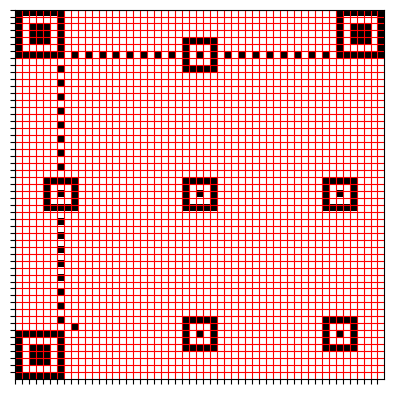

In [64]:
SIZE = VERSION*4 + 17

image = np.ones(shape = (SIZE, SIZE), dtype=bool)
reserved = np.zeros(shape = image.shape, dtype=bool)

finder_pattern = np.ones(shape = (9, 9), dtype=bool)
finder_pattern[1:8, 1:8] = 0
finder_pattern[2:7, 2:7] = 1
finder_pattern[3:6, 3:6] = 0

image[:8, :8] = finder_pattern[1:, 1:]
image[:8, -8:] = finder_pattern[1:, :-1]
image[-8:, :8] = finder_pattern[:-1, 1:]

reserved[:8, :8] = 1
reserved[:8, -8:] = 1
reserved[-8:, :8] = 1

image[6, 8:-8] = np.arange(SIZE-16) % 2
image[8:-8, 6] = np.arange(SIZE-16) % 2

reserved[6, 8:-8] = 1
reserved[8:-8, 6] = 1

image[-8, 8] = 0
reserved[-8, 8] = 1

if VERSION>1:

    alignment_pattern = np.zeros(shape = (5, 5), dtype=bool)
    alignment_pattern[1:4, 1:4] = 1
    alignment_pattern[2, 2] = 0

    alignments = pd.read_csv(
        "tables/alignments.csv",
        sep = ' '
    )

    temp = alignments["VERSION"] == VERSION
    temp = alignments[temp]["POSITIONS"].iloc[0]

    POSITIONS = list(
        map(
            lambda x: int(x) - 2, 
            temp.split(',')
        )
    )

    for row in POSITIONS:
        for col in POSITIONS:

            if row<8 and col<8: continue
            if row<8 and col+4>=SIZE-8: continue
            if row+4>=SIZE-8 and col<8: continue

            image[row:row+5, col:col+5] = alignment_pattern
            reserved[row:row+5, col:col+5] = 1


reserved[:9, :9] = 1
reserved[8, -8:] = 1
reserved[-8:, 8] = 1

if VERSION >= 7:

    reserved[:6, -11:] = 1
    reserved[-11:, :6] = 1

print("Output so far:")
show_image(image)

**March 6, 2023:**

The template, as I've witnessed, is gradually infused with the encoded data. Yet, the journey into the abyss doesn't culminate here. Whispers of a secretive process known as masking have reached my ears. Their intent is not to conceal the unsightliness of a QR code, for in this realm, form aligns with function. This masking ritual, it is said, serves a purpose quite the opposite—to render the QR code more palatable to the eyes of the mechanical beholders, the scanners that roam this digital wilderness. The malevolent squares continue to evolve, concealing their sinister secrets behind a deceptive facade.

Output so far:


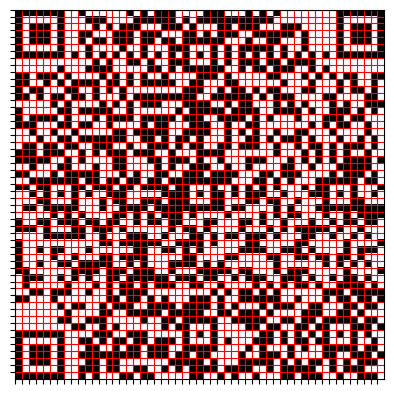

In [65]:
i, j = 0, 0
row, col = SIZE-1, SIZE-1
drow = -1

while col>=0:

    if not reserved[row, col]: 

        image[row, col] = output[j]=='0'
        j += 1

    if i%2:

        row += drow
        if row<0 or row>=SIZE:

            drow = -drow
            row += drow
            col -= 2 if col==7 else 1

        else: col += 1

    else: col -= 1

    i += 1

print("Output so far:")
show_image(image)

**March 7, 2023:**

They have achieved their sinister goal. The input has been masked, cloaked in a shroud of digital deception. At this juncture, I question whether salvation is even possible, even if I possessed the desire to intervene. I stand here as a helpless witness to the very malevolence I endeavored to confront, a harbinger of the evil that now lurks within the QR code's enigmatic labyrinth. The shadows of the code-wielders have prevailed, and I find myself at a crossroads, grappling with my limitations in the face of this relentless darkness.

Output so far:


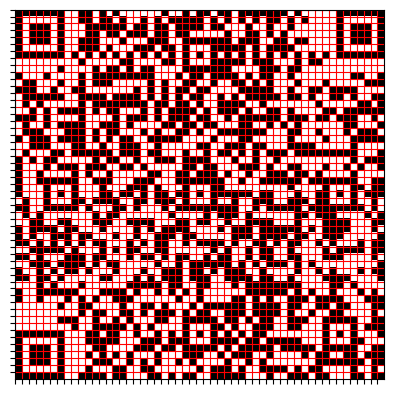

In [66]:
MASKS = [
    lambda row, col: (row + col) % 2 == 0,
    lambda row, _: row % 2 == 0,
    lambda _, col: col % 3 == 0,
    lambda row, col: (row + col) % 3 == 0,
    lambda row, col: (np.floor(row/2) + np.floor(col/3)) % 2 == 0,
    lambda row, col: ((row * col)%2) + ((row * col)%3) == 0,
    lambda row, col: (((row * col)%2) + ((row * col)%3)) % 2 == 0,
    lambda row, col: (((row + col)%2) + ((row * col)%3)) % 2 == 0
]

min_score = np.inf
opt_mask = -1

for i, mask in enumerate(MASKS):

    flags = np.array(
        [
            [
                0 if reserved[row, col] else mask(row, col)
                for col in range(SIZE)
            ]
            for row in range(SIZE)
        ], 
        dtype=bool
    )

    masked_image = np.logical_xor(image, flags)
    score = 0

    if score < min_score:

        min_score = score
        opt_mask = i

MASK = opt_mask

flags = np.array([
    [
        0 if reserved[row, col] else  MASKS[MASK](row, col)
        for col in range(SIZE)
    ]
    for row in range(SIZE)
])

image = np.logical_xor(image, flags)

print("Output so far:")
show_image(image)

**March 8, 2023:**

My investigation concludes today. The final step, adding format information, transforms the input into a fully functional QR code, haunting the uninitiated. I now possess the knowledge to save those who seek salvation, but this operation is too vast for one man. I don't know if the help would be welcomed either. I can only save someone who wants to be saved. 

The pen must be laid to rest. Adios!

Output so far:


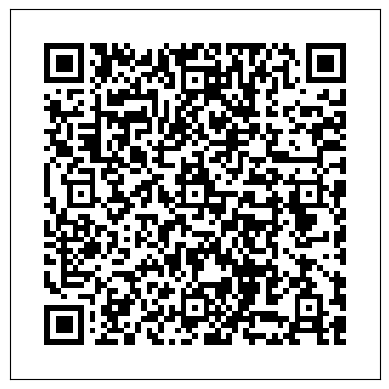

In [67]:
temp = FORMAT_INFO[FORMAT_INFO["ECLEVEL"] == ECLEVEL]
temp = temp[temp["MASK"] == str(MASK)]

FORMAT = np.array(
    list(
        map(
            lambda x: x=='0',
            str(temp["BITS"].iloc[0])
        )
    )
)

image[8, 0:6] = FORMAT[0:6]
image[0:6, 8] = FORMAT[14:8:-1]

image[8, 7] = FORMAT[6]
image[8, 8] = FORMAT[7]
image[7, 8] = FORMAT[8]

image[SIZE-7:, 8] = FORMAT[6::-1]
image[8, SIZE-8:] = FORMAT[7:]

if VERSION >= 7:

    format_info = pd.read_csv(
        "tables/version_info.csv",
        sep = ' ',
        dtype=str
    )

    temp = format_info["VERSION"] == str(VERSION)
    temp = format_info[temp]
    
    FORMAT = np.array(
        list(
            map(
                lambda x: x=='0',
                str(temp["BITS"].iloc[0])
            )
        )[::-1]
    )

    FORMAT = FORMAT.reshape(6, 3)
    image[-11:-8, :6] = FORMAT.T
    image[:6, -11:-8] = FORMAT

print("Output so far:")
show_image(image, grid=False, padding=True)